# RQ1
https://docs.google.com/document/d/1a_6lp-0RcdGTYWP4wBq3WuaPgDrjyvGIfMbyZjm9Z_U/edit?usp=sharing


In [79]:
# imports
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# suppress annoying warnings
pd.options.mode.chained_assignment = None

In [2]:
# change current working directory to content root
os.chdir('../..')
# check that this worked out
assert os.getcwd().split('/')[-1] == 'immun-ml'

In [4]:
# read in dataset
johannes_path = '/Users/johannesallgaier/Library/CloudStorage/GoogleDrive-johannes.allgaier@ikeb-wuerzburg.com/My Drive/23-12-06_Immun-ML/'
df = pd.read_excel('data/00_raw/2024.01.23_Mastertable_with Codebook-Header.xlsx')

## Target 1: ``

In [36]:
sars_igg_columns = [col for col in df.columns if 'SARS-IgG' in col and not 'dicho' in col]
target_df = df[['ID'] + sars_igg_columns]
target_df.dropna(how='all', inplace=True)
target_df.set_index('ID',inplace=True)
target_df.loc[:,'non_null_count'] = target_df.notnull().sum(axis=1)
print('How many SARS-IgG values do we have per patient?')
target_df['non_null_count'].describe()

How many SARS-IgG values do we have per patient?


count    483.000000
mean       5.453416
std        5.644316
min        0.000000
25%        1.000000
50%        3.000000
75%        8.000000
max       19.000000
Name: non_null_count, dtype: float64

**The variable SARS-IgG seems to be very sparse with 6 measurements per patient +/- 6 values. Some patients do not have any measurements and one patient has 20 measurements.**

In [66]:
target_df = target_df.sort_values(by='non_null_count', ascending=False)

<Figure size 1500x500 with 0 Axes>

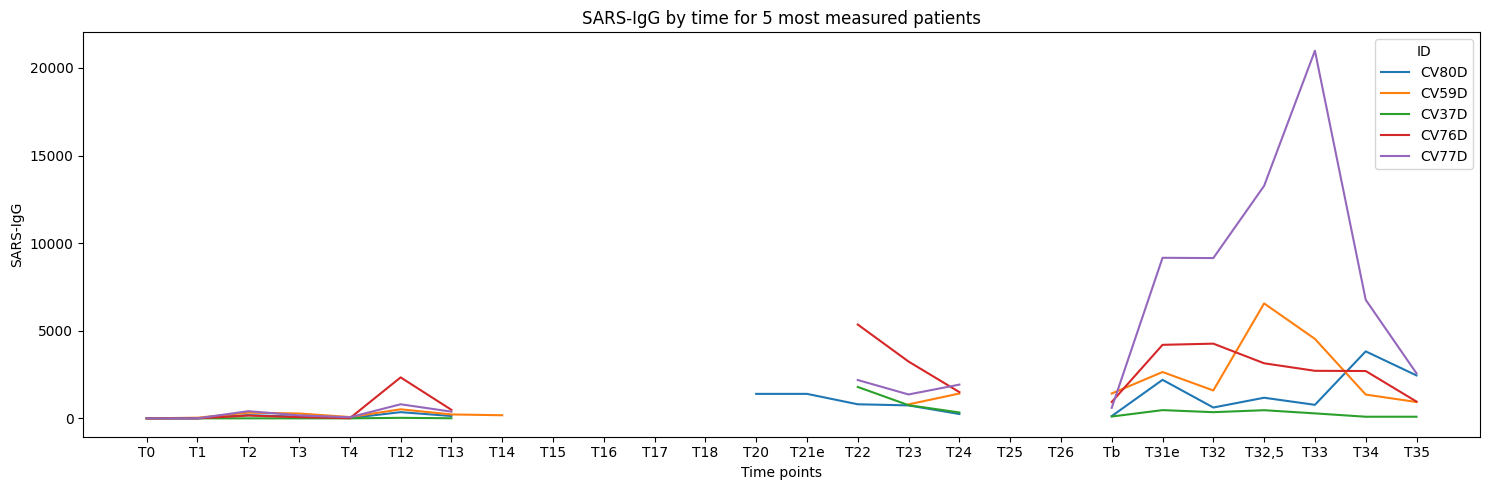

In [89]:
plt.figure(figsize=(15, 5))

sub_df=target_df.iloc[:5, :-1].T

ax = sub_df.plot(kind='line', figsize=(15,5))

# set xtick labels
plt.xticks(range(len(sub_df.index)), [idx.split('_')[-1] for idx in sub_df.index])

# Adding title and labels
plt.title('SARS-IgG by time for 5 most measured patients')
plt.xlabel('Time points')  # Replace 'X-axis Label' with your actual x-axis label
plt.ylabel('SARS-IgG')  # Replace 'Y-axis Label' with your actual y-axis label # Replace 'Legend Title' with your actual legend title

# layout
plt.tight_layout()

# Show the plot
plt.show()


Text(0.5, 1.0, 'SARS-IgG distribution by time points')

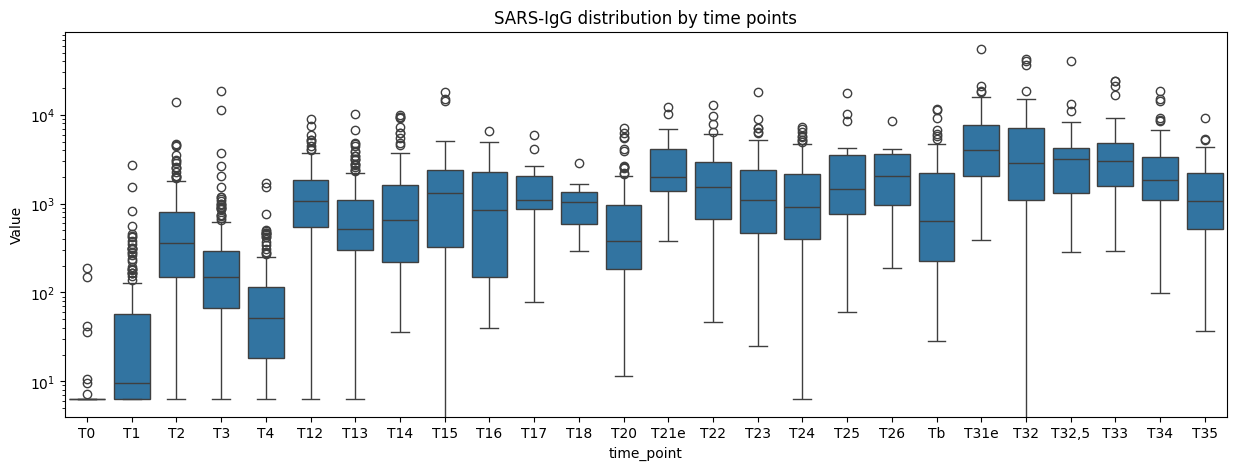

In [90]:
sub_df = target_df.iloc[:, :-1]

sub_df.rename(columns={col: col.split('_')[-1] for col in sub_df.columns}, inplace=True)

plt.figure(figsize=(15, 5))

target_df_melted = pd.melt(sub_df, var_name='time_point', value_name='Value')
# Convert to numeric, coerce errors to NaN
target_df_melted['Value'] = pd.to_numeric(target_df_melted['Value'], errors='coerce')

# Drop rows with NaN in the 'Value' column
target_df_melted = target_df_melted.dropna(subset=['Value'])

# Cast the 'Value' column to integers
target_df_melted['Value'] = target_df_melted['Value'].astype(float)

g = sns.boxplot(data=target_df_melted, x = 'time_point', y ='Value')
g.set_yscale("log")

plt.title('SARS-IgG distribution by time points')

### Problem: `SARS_IgG_12m`, der Target, exisitiert so nicht im Datensatz.

## Target 2: `SARS_RAI_12m`

In [ ]:
# TODO mit Eric klären, Targets nicht im Datensatz